## Cas Kaggle

Pau Bernués Tejada, 1598103

## Introducció

El cas sobre el que es treballarà és una col·lecció de més de 50.000 partides del videojoc League of Legends, així com fitxers .json que contenen un mètode per convertir entre els ID d'encanteris de campió i invocador i els seus noms. Per a cada partida, hi ha atributs per a:
> <ul>
    > <li>ID de la partida.</li>
    > <li>Temps de creació (en format Epoch).</li>
    > <li>Durada de la partida (en segons).</li>
    > <li>ID de temporada.</li>
    > <li>Guanyador (1 = team1, 2 = team2).</li>
    > <li>Primer baró, drac, torre, sang, inhibidor i Rift Herald (1 = team1, 2 = team2, 0 = none).</li>
    > <li>Campions i encanteris d'invocador per a cada equip (emmagatzemats com a identificadors d'encanteris de campió i invocador de Riot).</li>
    > <li>El nombre d'assassinats de torre, inhibidor, baró, drac i Rift Herald que té cada equip.</li>
    > <li>Les 5 sancions de cada equip (de nou, s'utilitzen identificacions de campió).</li>
> </ul>

## Exploració i visualització de dades

In [41]:
import pandas as pd

df = pd.read_csv('games.csv', header=0, delimiter=',')
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


Apliquem Exploratory Data Analysis per veure els detalls de la informació obtinguda:

In [42]:
import warnings

# Suprimir totes las FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

Observem que el dataset conté un total de 51490 mostres i 61 atributs, dels quals tots son de tipus enter i no nuls. Si mirem la informació del Kaggle aquesta inicialment es pot associar de la següent manera:</br>
> <ul>
    > <li> gameId: l'ID de la partida.</li>
    > <li> creationTime: temps de creació.</li>
    > <li> gameDuration: durada de la partida.</li>
    > <li> seasonID: ID de temporada.</li>
    > <li> winner: guanyador.</li>
    > <li> firstBaron, firstDragon, firstTower, firstBlood, firstInhibitor i firstRiftHerald: primer baró, drac, torre, sang, inhibidor i Rift Herald.</li>
    > <li> t1_champ1id,  t1_champ1_sum1, t1_champ1_sum2, t1_champ5id, t1_champ5_sum1, t1_champ5_sum2 i t2_champ1id... als campions i encanteris d'invocador per a cada equip, t1 per equip 1 i t2 per l'equip 2.</li>
    > <li> t1_towerKills, t1_inhibitorKills, t1_baronKills, t1_dragonKills, t1_riftHeraldKills i t2_towerKills, t2_inhibitorKills, t2_baronKills, t2_dragonKills, t2_riftHeraldKills al nombre d'assassinats de torre, inhibidor, baró, drac i Rift Herald que té cada equip.</li>
    > <li> t1_ban1, [...], t1_ban5 i t2_ban1, [...], t2_ban5 a les 5 sancions de cada equip.</li>
> </ul>

Podem observar el resum estadístic de les diferents característiques del dataset:

In [43]:
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


## Preprocessament de dades

Abans de triar un model, hem de fer un preprocessament de les dades del nostre dataset. En aquest processament, farem els següents passos:
<ul>
    <li>Mostreig de dades</li>
    <li>Conversió de dades</li>
    <li>Neteja de dades</li>
    <li>Normalització de dades</li>
</ul>

### Mostreig de dades

Comencem buscant columnes innecessàries. Començariem buscant columnes amb alt grau de nans, però com que aquest dataset no conté nans, no cal.
A continuació busquem les columnes o atributs que tinguin valors constants:

In [44]:
def constant(df):
    df_np = df.to_numpy()
    return (df_np[0] == df_np).all()

atributs = []
for i in range(df.shape[1]):
    constants = constant(df[df.columns.values[i]])
    if (constants):
        atributs.append(df.columns.values[i])

print('Atributs amb valors constants:', atributs)

Atributs amb valors constants: ['seasonId']


Com podem veure, només la columna de `seasonId` conté valors constants. Com que no afectarà al model, podem eliminar-la.

In [45]:
df = df.drop(atributs[0], axis=1)

Ara mirem si hi ha mostres duplicades al dataset, i les eliminem:

In [46]:
mostres = []
duplicades = df.duplicated().values
for i in range(duplicades.shape[0]):
    if (duplicades[i]):
        mostres.append(i)

print('Nombre de mostres duplicades:', len(mostres))

Nombre de mostres duplicades: 437


In [47]:
df.drop_duplicates(inplace=True)
df.shape

(51053, 60)

Podem veure que, un cop eliminades, la quantitat de mostres passa de 51490 a 51053.

### Neteja de dades

Tot seguit, tractarem el valors que son incorrectes, que s'han perdut o bé que es troben fora de rang (outliers). 
Alguns dels atributs tenen un rang de valors atribuït (categòrics) especificat en la descripció del Kaggle. Tot seguit, comprovem quants valors únics té cada atribut:

In [48]:
for columna in df:
    print(columna, ':', df[columna].unique())

gameId : [3326086514 3229566029 3327363504 ... 3322765040 3256675373 3317333020]
creationTime : [1504279457970 1497848803862 1504360103310 ... 1504029863961 1499562036246
 1503612754059]
gameDuration : [1949 1851 1493 ... 3373  585 3304]
winner : [1 2]
firstBlood : [2 1 0]
firstTower : [1 2 0]
firstInhibitor : [1 0 2]
firstBaron : [1 0 2]
firstDragon : [1 2 0]
firstRiftHerald : [2 1 0]
t1_champ1id : [  8 119  18  57  19  40  74 150 111 427  99  22  79 143  23  67 114 222
 421 134 238  96 122 498  41  78 412 497  24 157  25  35 240  43  92  85
 126  63  69  10  11  21 420  61  75 141 245 103 105  59 254   5  15  45
 106  81 131 236 201  48   9  31 117   4  64  28  82 101 268  27  62  53
 432 115  86 516  54 163   3 110  13  37  29  38 266  33  90 121   1  80
 120 113  16 267  12 161  17  34 107  51  76  42  58 202   7  60  91  89
  44   2   6  83 203 102 127  39 164  98  55  84  30 104 133  26  77 223
  32 429 112  36  14 154  68  20  50  72  56 136]
t1_champ1_sum1 : [12  7  4  3 11 14 

Com podem veure, els atributs `firstBaron`, `firstDragon`, `firstTower`, `firstBlood`, `firstInhibitor` i `firstRiftHerald` poden tenir tres diferents valors (0,1,2). També observem que `winner` és de tipus binari, però els valors són 1 o 2(equip 1 o equip 2) en comptes de 0 o 1. 
El que farem serà modificar els valors de `winner` per a que es trobin entre 0 i 1:

In [49]:
df.loc[df.winner == 1, 'winner'] = 0
df.loc[df.winner == 2, 'winner'] = 1

### Normalització de dades

Per últim, toca normalitzar les dades. Farem servir la funció següent, però com que encara no hem definit els conjunts de train i test, de moment no s'aplicarà:

In [50]:
def normalitzar(x, col, mitjana=None, std=None):
    if mitjana is None:
        mitjana = x.mean(0)
    if std is None:
        std = x.std(0)
    return pd.DataFrame(((x - mitjana[None, :]) / std[None, :]), columns = col), mitjana, std

## Selecció de model

Abans d'entrenar el nostre dataset, hem d'escollir un model. 
Per escollir aquest model, haurem de tenir en compte aquests punts:
<ul>
    <li>Determinar si li aplicarem aprenentatge supervisat o no supervisat.</li>
    <li>Adequar la mida del dataset al model escollit.</li>
    <li>Determinar el tipus de predicció a realitzar (categories, quantitats...).</li>
</ul>

L'atribut que volem predir será `winner` de forma categòrica, per veure si serà guanyador l'equip 1 o l'equip 2. 

Fent servir l'esquema del fitxer "ml_map.png", se'ns farà més fàcil l'elecció del model. 
Comencem mirant si el dataset té més de 50.000 mostres:

In [51]:
df.shape

(51053, 60)

Com podem veure, en tenim més de 50.000. 
Tot seguit, toca veure si volem predir de forma categòrica. Com hem dit abans, es just el que volem fer amb l'atribut `winner`, per tant també és correcte.

Amb això passem a la següent pregunta, que és si les nostres dades estan etiquetades. Efectivament ho estan, per tant, ja sabem que ens enfrentem a un problema d'etiquetatge supervisat.

Com que el nostre dataset té menys de 100.000 mostres, haurem de provar de fer servir la Classificació Lineal per Màquines de Vectors de Suport.

## Entrenament i proves de models

Un cop triat l'algorisme que farem servir (SVM), hem de distingir entre l'atribut objectiu i les característiques. 
Per això mateix, dividim el dataset, separant-ne l'atribut `winner`, que actuarà com a etiquetador, i quedant-nos només amb les característiques:

In [52]:
df_carac = df.drop('winner',axis=1)
df_carac.head()

,gameId,creationTime,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,2,1,1,1,1,2,8,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,1,1,1,0,1,1,119,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,2,1,1,1,2,0,18,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,1,1,1,1,1,0,57,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,2,1,1,1,1,0,19,...,3,0,0,1,0,86,11,201,122,18


I assignem l'etiquetador a una variable que conté les classes etiquetades:

In [53]:
df_obj = df['winner']
df_obj.head()

0    0
1    0
2    0
3    0
4    0
Name: winner, dtype: int64

Un cop fet això, preparem els conjunts que farem servir per a triar els diferents models que provarem, els quals seran amb les següents metodologies:
<ul>
    <li>Sense Validació Creuada.</li>
    <li>Sense Validació Creuada amb PCA</li>
    <li>Amb Validació Creuada - Grid Search</li>
</ul>

In [54]:
list_X_train = []
list_X_test = []
list_y_train = []
list_y_test = []
models = []

### Sense Validació Creuada

En aquest apartat buscarem un model sense fer servir la tècnica de validació creuada. 
Primer, comencem dividint el dataset en els conjunts train i test en una proporció del 70% i el 30% del total de les dades, respectivament, i barrejant-les una mica per a que sigui més aleatòria la divisió:

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_carac, df_obj, test_size=0.30, random_state=42)
list_y_train.append(y_train)
list_y_test.append(y_test)
y_train.head()

38747    1
45142    0
17437    0
30550    0
10458    1
Name: winner, dtype: int64

En SVM, busquem minimitzar el vector de decisió. L'hiperpla més òptim es veu influenciat per l'escalabilitat del valor de les mostres, i per això haurem de normalitzar-les, per a que estiguin totes en un rang de valors similar. Això ho farem amb la funció que hem implementat abans, normalitzar():

In [56]:
X_train, mitjana, std = normalitzar(X_train.values, X_train.columns.values)
X_test, a, b = normalitzar(X_test.values, X_test.columns.values, mitjana, std)
list_X_train.append(X_train)
list_X_test.append(X_test)
X_test.head()

,gameId,creationTime,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,0.641219,0.648070,2.102207,1.013939,1.008900,-0.454329,1.272724,0.979857,-0.885301,0.359944,...,0.117787,0.013319,2.591460,2.116806,-0.559586,-0.947131,0.057575,0.101527,1.324833,-0.878418
1,0.629173,0.639788,0.296872,-0.904583,1.008900,1.023720,1.272724,0.979857,-0.885301,-0.892645,...,1.153494,0.809289,0.957071,2.116806,-0.559586,-0.035493,-0.495574,-0.386394,-0.402802,0.466299
2,0.836131,0.854165,-0.015741,-0.904583,-0.830362,-0.454329,1.272724,-0.775565,0.331686,-0.480720,...,0.117787,0.013319,0.957071,-0.329143,-0.559586,-0.161570,0.474862,-0.776730,0.101901,-0.036761
3,0.546607,0.542490,-0.488567,1.013939,1.008900,1.023720,-1.102261,0.979857,-0.885301,0.048899,...,0.894568,0.809289,-0.677318,-0.329143,-0.559586,-0.268251,-0.767296,-0.835281,1.256892,-0.752653
4,-0.515862,-0.499554,0.529377,1.013939,1.008900,1.023720,0.085232,0.979857,-0.885301,-0.211707,...,0.635641,0.013319,-0.677318,1.301490,-0.559586,0.129378,-0.825522,-0.035091,0.053372,-0.559169


Com podem observar, només calculem mitjana i desviació mitjana (std) amb el conjunt d'entrenament (train), per tant les variables "a" i "b" són irrellevants.

Un cop feta la normalització de les dades, ja podem aplicar l'agorisme SVM per a obtenir el model `Sense Validació creuada`:

In [57]:
from sklearn.svm import SVC
modelSenseValidacioCreuada = SVC()
modelSenseValidacioCreuada.fit(X_train, y_train)

SVC()

I, per últim, l'afegim a la nostra llista de models:

In [58]:
models.append(modelSenseValidacioCreuada)

### Sense Validació Creuada amb PCA

Un cop fet el model sense validació creuada, ara farem servir la mateixa metodologia, però afegint un Anàlisis de Components Principals (PCA), per a reduir la dimensionalitat de les dades.

Comencem aplicant els processos de l'apartat anterior, com són la divisió de les dades en els conjunts de train (70%) i test (30%), i la normalització de les dades:

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_carac, df_obj, test_size=0.30, random_state=42)
list_y_train.append(y_train)
list_y_test.append(y_test)
X_train, mitjana, std = normalitzar(X_train.values, X_train.columns.values)
X_test, a, b = normalitzar(X_test.values, X_test.columns.values, mitjana, std)

Un cop fet això, procedim a aplicar el PCA. S'ha decidit fer-lo de dos a deu components, etiquetant cada característica nova amb la nomenclatura "compX", on X serà un nombre del 2 al 10.

In [60]:
from sklearn.decomposition import PCA
X_trains_PCA = []
X_tests_PCA = []

col = ['comp1']
for i in range(2, 11):
    col.append('comp' + str(i))
    pca = PCA(n_components=i)
    X_train_PCA = pd.DataFrame(pca.fit_transform(X_train), columns = col)
    X_test_PCA = pd.DataFrame(pca.transform(X_test), columns = col)
    X_trains_PCA.append(X_train_PCA)
    X_tests_PCA.append(X_test_PCA)
list_X_train.append(X_trains_PCA)
list_X_test.append(X_tests_PCA)

Un cop generades les noves característiques, passem a executar l'algorisme per tots els datasets :

In [61]:
models_PCA = []
i = 2

for aux_train_PCA in X_trains_PCA:
    model = SVC()
    model.fit(aux_train_PCA, y_train)
    models_PCA.append(model)
    print('SVC() PCA: n_components=' + str(i))
    i += 1
models.append(models_PCA)

SVC() PCA: n_components=2
SVC() PCA: n_components=3
SVC() PCA: n_components=4
SVC() PCA: n_components=5
SVC() PCA: n_components=6
SVC() PCA: n_components=7
SVC() PCA: n_components=8
SVC() PCA: n_components=9
SVC() PCA: n_components=10


### Grid Search amb Validació Creuada

Per últim, aplicarem un algorisme de Grid Search amb Validació Creuada, que cerca de manera sistemàtica els millors hiperparàmetres per a un model d'aprenentatge automàtic, avaluant el seu rendiment en diverses combinacions a través de particions del conjunt de dades (Validació Creuada).

Començarem dividint el nostre dataset en els conjunts de train i test:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_carac, df_obj, test_size=0.30, random_state=42)
list_y_train.append(y_train)
list_y_test.append(y_test)
X_train, mitjana, std = normalitzar(X_train.values, X_train.columns.values)
X_test, a, b = normalitzar(X_test.values, X_test.columns.values, mitjana, std)
list_X_train.append(X_train)
list_X_test.append(X_test)

Com podem observar, s'ha dut a terme la divisió de la mateixa forma que en els dos anteriors apartats.
Tot seguit, guardarem en un diccionari les diferents combinacions d'hiperparàmetres que provarem. Tindrem dos hiperparàmetres: el `kernel` i el penalitzador `C`. En el cas del kernel, només farem servir el kernel "linear" o lineal, i el penalitzador tindrà tres valors diferents:

In [63]:
hiperparams = {'C': [0.1, 1, 10], 'kernel': ['linear']}

Un cop tenim els hiperparàmetres clars, podem executar l'algorisme de GridSearch j, passant el paràmetre cv=3 per a indicar la que validació creuada serà dividint el conjunt de dades en 3 "folds" (k-fold): 

In [64]:
from sklearn.model_selection import GridSearchCV
modelGridSearch = GridSearchCV(SVC(), hiperparams, refit=True, verbose=1, n_jobs=-1, cv=3)
modelGridSearch.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']}, verbose=1)

Un cop extret el model, el guardem a la llista de models juntament amb els que hem trobat anteriorment, i comprovem quins han sigut els millors hiperparàmetres. En aquest cas, com que el kernel és el mateix sempre, només ens interessarà el millor valor del penalitzador:

In [65]:
models.append(modelGridSearch)
modelGridSearch.best_params_

{'C': 1, 'kernel': 'linear'}

## Avaluació dels models

En aquesta secció avaluarem la eficiència dels models que hem extret anteriorment, lo qual ens ajudarà a extreure'n conclusions. Farem servir les següents mètriques per a dur-ho a terme:
<ul>
    <li><b>Accuracy</b>: mesura el % de prediccions que el model ha encertat, però hem de tenir en compte la resta de mètriques per evitar problemes d'overfitting.</li>
    <li><b>Precision</b>:  mesura la qualitat del model en tasques de classificació.</li>
    <li><b>Recall</b>: mesura la capacitat del model de detectar mostres positives.</li>
    <li><b>F1-Score</b>: és una combinació de precision i recall.</li>
    <li><b>Error quadràtic mitjà (MSE)</b>: mesura l'error quadrat fruit de la mitjana de les nostres prediccions. Com més gran sigui aquest valor, pitjor és el model.</li>
</ul>

### Sense Validació Creuada

Començarem avaluant el primer model realitzat mitjançant la `matriu de confusió`:

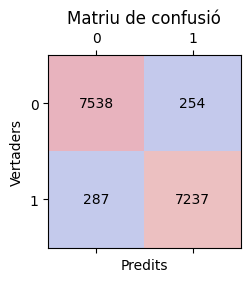

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve
prediccions = models[0].predict(list_X_test[0])
cm = confusion_matrix(list_y_test[0], prediccions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap="coolwarm", alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center')
plt.title('Matriu de confusió')
plt.xlabel('Predits')
plt.ylabel('Vertaders')
plt.show()

Com podem veure, aquesta matriu esta dividida en 4 parts: `Verdaders Negatius` (0,0), `Falsos Positius` (0,1), `Falsos Negatius` (1,0) i `Verdaders Positius` (1,1). 
Com podem observar, tenim 7538 VN, 254 FP, 287 FN i 7237 VP.
Per tant, entre un 96-97% de les prediccions han sigut correctes, mentres que menys d'un 4% han sigut prediccions errònies.

Tot seguit, calcularem les 4 mètriques anteriorment esmentades mitjançant la funció `classification_report`:

In [67]:
print(classification_report(list_y_test[0], prediccions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7792
           1       0.97      0.96      0.96      7524

    accuracy                           0.96     15316
   macro avg       0.96      0.96      0.96     15316
weighted avg       0.96      0.96      0.96     15316



Com podem veure, totes les mètriques ens indiquen que el model és molt acertat, ja que ens donen percentatges molt propers al 100%. A destacar que la mètrica f1-score no serà gaire rellevant en aquest cas, ja que hi ha molt poca diferència entre Falsos Positius i Falsos Negatius.

Ara procedim a veure les corbes Precision-Recall i ROC per acabar de veure com de bon rendiment aporta el model:

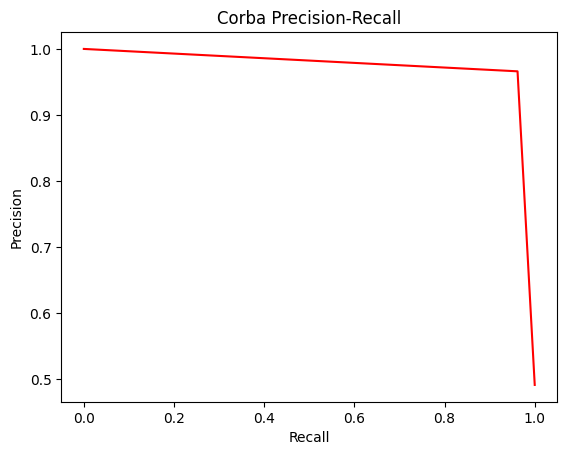

In [68]:
precision, recall, _ = precision_recall_curve(list_y_test[0], prediccions)
plt.plot(recall, precision, color='red')
plt.title('Corba Precision-Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

Com podem observar, la corba Precision-Recall té una tendència positiva apropant-se a la cantonada de dalt a la dreta, la qual cosa ens indica que el percentatge de Falsos Positius i Falsos Negatius és molt baix, tal i com hem vist abans. També es veu que les classes estan molt balancejades.

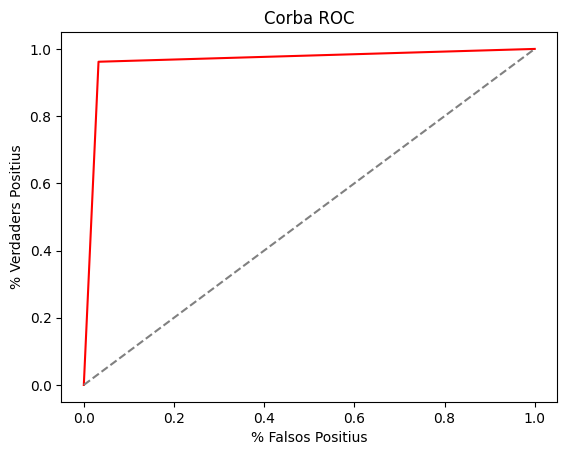

In [69]:
fpr, tpr, _ = roc_curve(list_y_test[0].values, prediccions)
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('Corba ROC')
plt.ylabel('% Verdaders Positius')
plt.xlabel('% Falsos Positius')
plt.show()

Amb la corba ROC també podem observar que el model té un rendiment molt bo, apropant-se aquesta a la cantonada de dalt a l'esquerra, la qual cosa ens indica que l'ordre de classificació de les classes és molt correcte.


### Sense Validació Creuada amb PCA

Seguirem els mateixos passos que amb el model anterior per a dur a terme l'avaluació. 
Comencem prenent els valors de les mètriques esmentades per a cada nombre de components (de 2 a 10):

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
accuracy_PCA = []
precision_PCA = []
recall_PCA = []
mse_PCA = []
prediccions_PCA = []
for i in range(len(models_PCA)):
    prediccions = models[1][i].predict(list_X_test[1][i])
    prediccions_PCA.append(prediccions)
    accuracy_PCA.append(accuracy_score(list_y_test[1], prediccions))
    precision_PCA.append(precision_score(list_y_test[1], prediccions))
    recall_PCA.append(recall_score(list_y_test[1], prediccions))
    mse_PCA.append(mean_squared_error(list_y_test[1], prediccions))
    print('PCA: num_components=' + str(i+2) + ' Accuracy: ' + str(accuracy_PCA[i]) + ' Precision: ' + str(precision_PCA[i]) + ' Recall: ' + str(recall_PCA[i]))

PCA: num_components=2 Accuracy: 0.9209976495168452 Precision: 0.9356886558101021 Recall: 0.9011164274322169
PCA: num_components=3 Accuracy: 0.9198876991381562 Precision: 0.935416954778039 Recall: 0.898989898989899
PCA: num_components=4 Accuracy: 0.9322930268999738 Precision: 0.9511754068716094 Recall: 0.9088250930356193
PCA: num_components=5 Accuracy: 0.9334029772786628 Precision: 0.9524207011686143 Recall: 0.9098883572567783
PCA: num_components=6 Accuracy: 0.9312483677200314 Precision: 0.9476961394769614 Recall: 0.9102870813397129
PCA: num_components=7 Accuracy: 0.9341211804648734 Precision: 0.9481359196588252 Recall: 0.9160021265284424
PCA: num_components=8 Accuracy: 0.9336641420736485 Precision: 0.9478392513074594 Recall: 0.915337586390218
PCA: num_components=9 Accuracy: 0.9325541916949596 Precision: 0.948459306342407 Recall: 0.9122807017543859
PCA: num_components=10 Accuracy: 0.9316401149125098 Precision: 0.9440559440559441 Recall: 0.9150717703349283


In [71]:
for i in range(len(models_PCA)):
    print('Error quadràtic mitjà per a PCA amb ' + str(i + 2) + ' components: ' + str(mse_PCA[i]))

Error quadràtic mitjà per a PCA amb 2 components: 0.07900235048315488
Error quadràtic mitjà per a PCA amb 3 components: 0.08011230086184383
Error quadràtic mitjà per a PCA amb 4 components: 0.06770697310002612
Error quadràtic mitjà per a PCA amb 5 components: 0.06659702272133716
Error quadràtic mitjà per a PCA amb 6 components: 0.06875163227996867
Error quadràtic mitjà per a PCA amb 7 components: 0.06587881953512667
Error quadràtic mitjà per a PCA amb 8 components: 0.06633585792635152
Error quadràtic mitjà per a PCA amb 9 components: 0.06744580830504047
Error quadràtic mitjà per a PCA amb 10 components: 0.0683598850874902


Podem observar que el valor de les mètriques va augmentant proporcionalment amb el nombre de components, però cap arriba als valors obtinguts amb l'anterior model (96-97%), potser degut a la baixa correlació entre moltes variables. 
Per altra banda, veiem també que l'Error Quadràtic Mitjà disminueix quan anem augmentant el nombre de variables, la qual cosa ens indica també que com més components, més fiable és el model.

Per últim, comparem les corbes Precision-Recall i ROC per a n_components=2 i n_components=10 (els valors frontera):

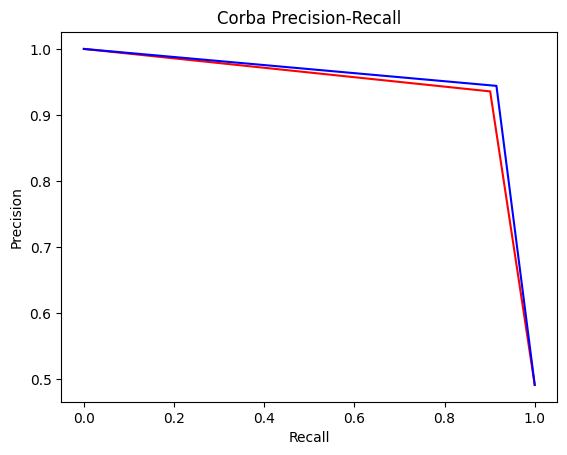

In [72]:
precision, recall, _ = precision_recall_curve(list_y_test[1], prediccions_PCA[0])
plt.plot(recall, precision, color='red')
precision, recall, _ = precision_recall_curve(list_y_test[1], prediccions_PCA[-1])
plt.plot(recall, precision, color='blue')
plt.title('Corba Precision-Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

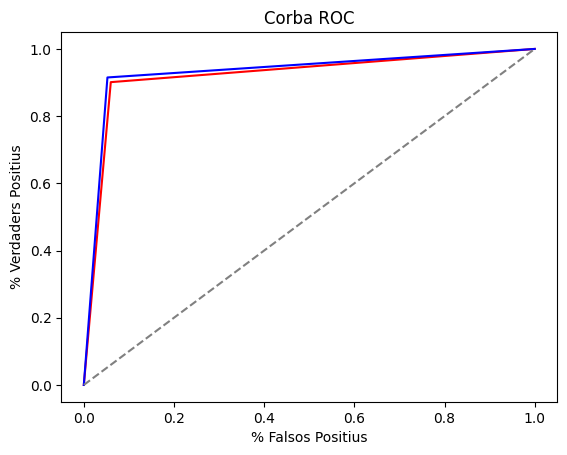

In [73]:
fpr, tpr, _ = roc_curve(list_y_test[1].values, prediccions_PCA[0])
plt.plot(fpr, tpr, color='red')
fpr, tpr, _ = roc_curve(list_y_test[1].values, prediccions_PCA[-1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('Corba ROC')
plt.ylabel('% Verdaders Positius')
plt.xlabel('% Falsos Positius')
plt.show()

Podem veure que les dues corbes s'apropen a les cantonades en proporció amb l'augment de la seva dimensió.

### Grid Search amb Validació Creuada

Per últim, toca avaluar el model de Grid Search amb Validació Creuada, agafant els seus millors hiperparàmetres, els quals són: 

In [74]:
modelGridSearch.best_params_

{'C': 1, 'kernel': 'linear'}

Ara passem a mostrar la matriu de confusió:

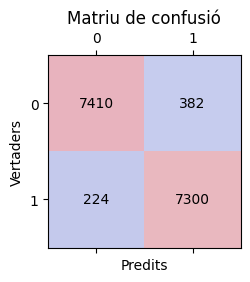

In [75]:
prediccions = models[2].predict(list_X_test[2])
cm = confusion_matrix(list_y_test[2], prediccions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap="coolwarm", alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center')
plt.title('Matriu de confusió')
plt.xlabel('Predits')
plt.ylabel('Vertaders')
plt.show()

Es pot observar que s'assembla bastant a la matriu de confusió del primer model, encara que els Verdaders Negatius han disminuït, mentres que els Verdaders Positius han augmentat una mica, però és molt similar, per tant, segueix sent un model molt bo amb un alt grau d'encerts.

Passem a mirar les mètriques esmentades:

In [76]:
print(classification_report(list_y_test[2], prediccions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7792
           1       0.95      0.97      0.96      7524

    accuracy                           0.96     15316
   macro avg       0.96      0.96      0.96     15316
weighted avg       0.96      0.96      0.96     15316



Podem observar que dona resultats molt bons, però no superen encara els del primer model, que segueix sent el millor.

Per últim, visualitzem les corbes Precision-Recall i ROC d'aquest últim model:

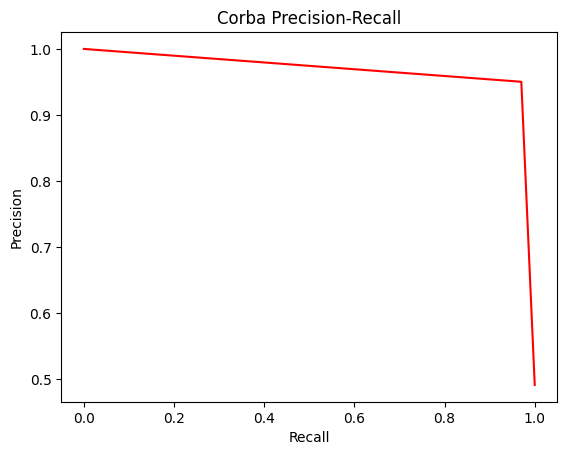

In [77]:
precision, recall, _ = precision_recall_curve(list_y_test[2], prediccions)
plt.plot(recall, precision, color='red')
plt.title('Corba Precision-Recall')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

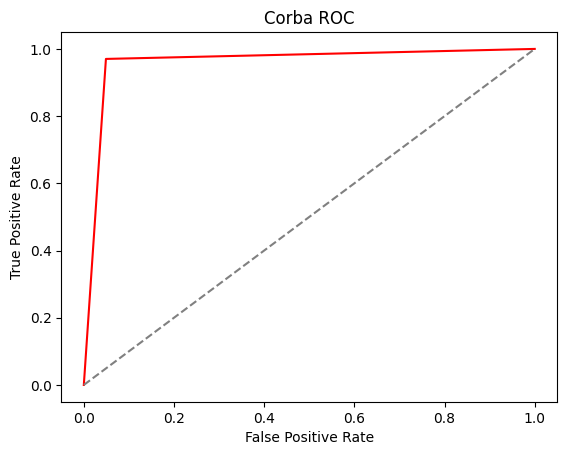

In [78]:
fpr, tpr, _ = roc_curve(list_y_test[2].values, prediccions)
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('Corba ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Podem veure que les corbes segueixen la mateixa tendència que la resta de corbes dels altres models.

## Conclusions

Per últim, toca treure conclusions un cop avaluats els models.
A continuació, tenim una taula que resumeix una mica la feina feta i els seus resultats: 

| Model | Hiperparàmetres | Accuracy | Precision | Recall |
| ----- | --------------- | -------- | --------- | ------ |
| Sense Validació Creuada | - | 0.96 | 0.96 | 0.96 |
| Sense Validació Creuada (PCA: `n_components=2`) | - | 0.92 | 0.93 | 0.90 | 
| Sense Validació Creuada (PCA: `n_components=3`) | - | 0.92 | 0.93 | 0.90 | 
| Sense Validació Creuada (PCA: `n_components=4`) | - | 0.93 | 0.95 | 0.91 | 
| Sense Validació Creuada (PCA: `n_components=5`) | - | 0.93 | 0.95 | 0.91 | 
| Sense Validació Creuada (PCA: `n_components=6`) | - | 0.93 | 0.95 | 0.91 | 
| Sense Validació Creuada (PCA: `n_components=7`) | - | 0.93 | 0.95 | 0.92 | 
| Sense Validació Creuada (PCA: `n_components=8`) | - | 0.93 | 0.95 | 0.92 | 
| Sense Validació Creuada (PCA: `n_components=9`) | - | 0.93 | 0.95 | 0.91 | 
| Sense Validació Creuada (PCA: `n_components=10`) | - | 0.93 | 0.94 | 0.92 | 
| Grid Search amb Validació Creuada | `'C': [0.1, 1, 10], 'kernel': ['linear']` | 0.96 | 0.96 | 0.96 | 

Si ens fixem en la taula, podem deduïr ràpidament que els dos millors models són el primer i l'ultim, és a dir, el que no fa servir Validació Creuada, i el que fa un Grid Search amb Validació Creuada, ja que els valors de les seves mètriques són molt semblants, però si ens fixem en detall als resultats obtinguts, veuriem que el primer model és lleugerament millor. Adicionalment, el primer model comporta menys càrrega computacional que el que fa un Grid Search amb VC, sent molt més ràpid. 
En resum, el millor model que hem aconseguit és el que no fa servir Validació Creuada, amb valors entre 96-97% de accuracy, precision i recall, mentres que el pitjor ha sigut el que no fa servir Validació Creuada amb PCA amb 2 components, degut a la poca informació que ens proporcionen tan poques característiques.